# Detección de Outliers

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


%matplotlib inline

In [3]:
Rios=pd.read_csv("/Users/juanalbertomartinez/Desktop/RCH/Detec_outliers/Rios.csv", 
                engine="python", index_col=0)

Rios

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
137,720
138,270
139,430


Obtenemos el histograma para ver como están distribuidos los valores

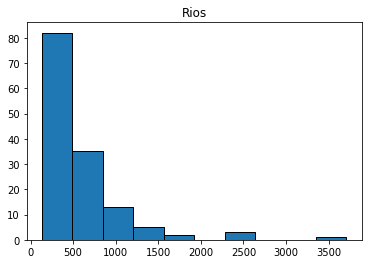

In [4]:
plt.title("Rios")
plt.hist(Rios["Millas"], edgecolor="black", linewidth=1)
plt.show() # con la función show evitamos que se despliege el resultado en forma de texto

Hacemos un gráfico de caja y bigotes para ver los outliers

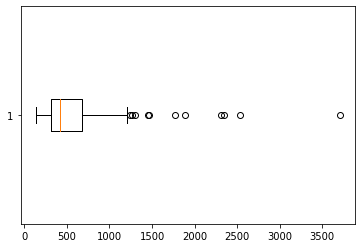

In [5]:
plt.boxplot(Rios["Millas"], vert=False)
plt.show()

In [7]:
Q1 = Rios["Millas"].quantile(0.25)
print("Primer quartil", Q1)

Q3 = Rios["Millas"].quantile(0.75)
print("Primer quartil", Q3)

IQR = Q3 - Q1
print("Rango interquartil", IQR)

Mediana = Rios["Millas"].median()
print("Mediana", Mediana)

Valor_min = Rios["Millas"].min()
print("Valor mínimo", Valor_min)

Valor_max = Rios["Millas"].max()
print("Valor máximo", Valor_max)


Primer quartil 310.0
Primer quartil 680.0
Rango interquartil 370.0
Mediana 425.0
Valor mínimo 135
Valor máximo 3710


Calcular los valores de los bigotes inferior y superior

In [9]:
BI_cal = (Q1 - 1.5 * IQR)
print("Bigote inferior calculado \n", BI_cal)

BS_cal = (Q3 + 1.5 * IQR)
print("Bigote superior \n", BS_cal)

Bigote inferior calculado 
 -245.0
Bigote superior 
 1235.0


### Ubicación de los outliers

Ubicamos las filas en las que se encuentran los outliers

In [10]:
ubicacion_outliers = (Rios["Millas"] < BI_cal) | (Rios["Millas"] > BS_cal)
print("\n Ubicación de Outliers \n", ubicacion_outliers)


 Ubicación de Outliers 
 Rio
1      False
2      False
3      False
4      False
5      False
       ...  
137    False
138    False
139    False
140    False
141     True
Name: Millas, Length: 141, dtype: bool


Obtenemos los valores de los outliers

In [11]:
outliers = Rios[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
      Millas
Rio        
7      1459
23     1450
25     1243
66     2348
68     3710
69     2315
70     2533
83     1306
98     1270
101    1885
141    1770


Ordenar los outliers

In [12]:
outliers_ordenados = outliers.sort_values("Millas")
outliers_ordenados

,Millas
Rio,
25,1243
98,1270
83,1306
23,1450
7,1459
141,1770
101,1885
69,2315
66,2348


Nos quedamos solo con los valores que no son outliers

In [13]:
ubicacion_sin_outliers = (Rios["Millas"] >= BI_cal) & (Rios["Millas"] <= BS_cal)
sin_outliers = Rios[ubicacion_sin_outliers]
sin_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


Hacer un gráfico de caja y bigotes para ver si el objeto "sin_outliers" no contiene outliers

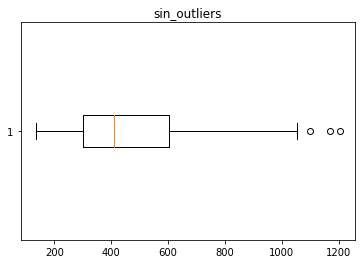

In [14]:
plt.title("sin_outliers")
plt.boxplot(sin_outliers["Millas"], vert=False)
plt.show()